In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
met0 = open('../data/metabolome_2.txt', 'rU').read() #this table contains only the already characterized metabolites
keys = open('../data/sample_key_microbiota_rnaseq_metabolomics.csv', 'rU').read()

In [3]:
kkeys = [i.split(',')[4] for i in keys.split('\n')[1:] if i.split(',')[4] != '-']
kvalues = [i.split(',')[1] for i in keys.split('\n')[1:] if i.split(',')[4] != '-']
kdict = dict(zip(kkeys, kvalues))

In [4]:
met0.split('\n')[0].split('\t').index('A1')

32

In [5]:
met1 = [[i.split('\t')[5]]+i.split('\t')[32:] for i in met0.split('\n')]

Now, for each row, I need to generate an array with all the values relative to each group, and then, for each row,  
a list of arrays called 'data'

In [115]:
wk6 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == '6wk']
wk10 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == '10wk']
wk16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == '16wk']
smt10 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'smt_10wk']
smt16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'smt_16wk']
ymt10 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'ymt_10wk']
ymt16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'ymt_16wk']

In [116]:
wk6_ = np.array([int(met1[1][i]) for i in wk6 ])
wk10_ = np.array([int(met1[1][i]) for i in wk10 ])
wk16_ = np.array([int(met1[1][i]) for i in wk16 ])
smt10_ = np.array([int(met1[1][i]) for i in smt10 ])
smt16_ = np.array([int(met1[1][i]) for i in smt16 ])
ymt10_ = np.array([int(met1[1][i]) for i in ymt10 ])
ymt16_ = np.array([int(met1[1][i]) for i in ymt16 ])

In [117]:
data = map(np.log, [wk6_, wk10_, wk16_, ymt10_, ymt16_, smt10_, smt16_])

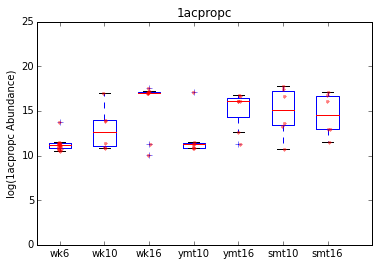

In [118]:
plt.boxplot(data) 
plt.ylim(0,25)
plt.title(met1[1][0])

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['wk6', 'wk10', 'wk16', 'ymt10', 'ymt16', 'smt10', 'smt16'])
plt.ylabel('log(' + met1[1][0]+' Abundance)')

for i in [1,2,3,4,5,6,7]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.5)

In [380]:
def plotit(j,up):
    wk6 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == '6wk']
    wk10 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == '10wk']
    wk16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == '16wk']
    smt10 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'smt_10wk']
    smt16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'smt_16wk']
    ymt10 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'ymt_10wk']
    ymt16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'ymt_16wk']

    wk6_ = np.array([int(met1[j][i]) for i in wk6 ])
    wk10_ = np.array([int(met1[j][i]) for i in wk10 ])
    wk16_ = np.array([int(met1[j][i]) for i in wk16 ])
    smt10_ = np.array([int(met1[j][i]) for i in smt10 ])
    smt16_ = np.array([int(met1[j][i]) for i in smt16 ])
    ymt10_ = np.array([int(met1[j][i]) for i in ymt10 ])
    ymt16_ = np.array([int(met1[j][i]) for i in ymt16 ])

    data = [wk6_, wk10_, wk16_, ymt10_, ymt16_, smt10_, smt16_]
    data_log = map(np.log, [wk6_, wk10_, wk16_, ymt10_, ymt16_, smt10_, smt16_])
    data_min = [wk6_, ymt16_, wk16_, smt16_]
    data_min_log = map(np.log, data_min)

    plt.figure(figsize=(15,8))

    plt.subplot(2,2,1)
    plt.boxplot(data) 
    plt.ylim(0,up)
    plt.title(met1[j][0])
    plt.subplots_adjust(top=1.0, hspace=0.3, wspace=0.2)

    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['wk6', 'wk10', 'wk16', 'ymt10', 'ymt16', 'smt10', 'smt16'])
    plt.ylabel(met1[j][0]+' Abundance')

    for i in [1,2,3,4,5,6,7]:
        y = data[i-1]
        x = np.random.normal(i, 0.02, len(y))
        plt.plot(x, y, 'r.', alpha=0.5)


    plt.subplot(2,2,2)
    plt.boxplot(data_log) 
    plt.ylim(10,22)
    plt.title(met1[j][0])
    plt.subplots_adjust(top=1.0, hspace=0.3, wspace=0.2)

    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['wk6', 'wk10', 'wk16', 'ymt10', 'ymt16', 'smt10', 'smt16'])
    plt.ylabel('log(' + met1[j][0]+' Abundance)')

    for i in [1,2,3,4,5,6,7]:
        y = data[i-1]
        x = np.random.normal(i, 0.02, len(y))
        plt.plot(x, y, 'r.', alpha=0.5)

    plt.subplot(2,2,3)
    plt.boxplot(data_min) 
    plt.ylim(0,up)
    plt.title(met1[j][0])
    plt.subplots_adjust(top=1.0, hspace=0.3, wspace=0.2)

    plt.xticks([1, 2, 3, 4, 5], ['wk6', 'ymt16', 'wk16', 'smt16'])
    plt.ylabel(met1[j][0]+' Abundance')

    for i in [1,2,3,4]:
        y = data[i-1]
        x = np.random.normal(i, 0.02, len(y))
        plt.plot(x, y, 'r.', alpha=0.5)


    plt.subplot(2,2,4)
    plt.boxplot(data_min_log) 
    plt.ylim(10,22)
    plt.title(met1[j][0])
    plt.subplots_adjust(top=1.0, hspace=0.3, wspace=0.2)

    plt.xticks([1, 2, 3, 4, 5], ['wk6', 'ymt16', 'wk16', 'smt16'])
    plt.ylabel('log(' + met1[j][0]+' Abundance)')

    for i in [1,2,3,4]:
        y = data[i-1]
        x = np.random.normal(i, 0.02, len(y))
        plt.plot(x, y, 'r.', alpha=0.5)

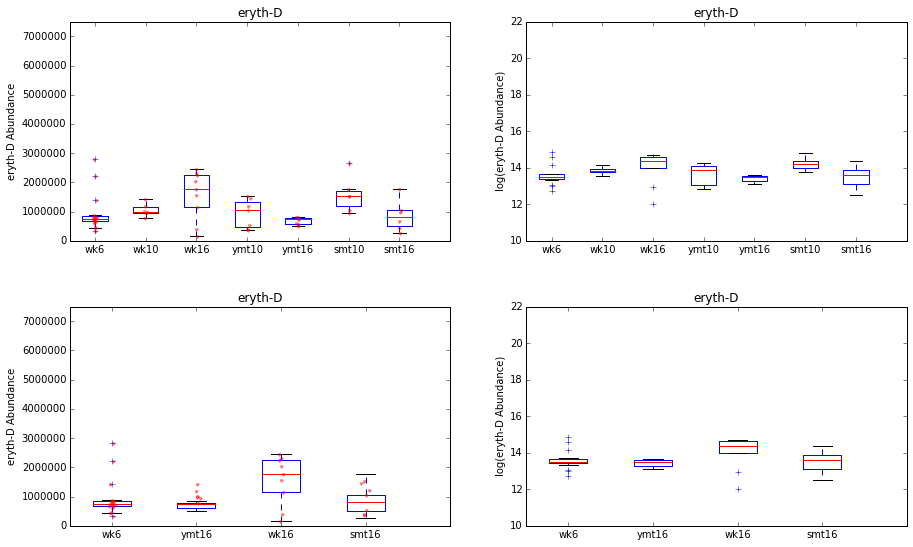

In [537]:
plotit(85, 7500000)

In [536]:
[met1.index(i) for i in met1 if i[0] == 'eryth-D']

[85]

55, 56, 65, 85, 99, 102, 110, 121, 123, 124, 125, 158, 159, 161, 162, 190, 211, 212 seem potentially interesting, in  
that wk6 and ymt16 look more 'alike' than to wk16 and smt16

In [538]:
eyeballing = [55, 56, 65, 85, 99, 102, 110, 121, 123, 124, 125, 158, 159, 161, 162, 190, 211, 212]
[met1[i][0] for i in eyeballing ]

['asn-L',
 'asn-L',
 '"citrcon;itacon"',
 'eryth-D',
 'gln-L',
 'glu-L',
 'glyb',
 'gthox',
 'gudac',
 'hom-L',
 'hom-L',
 'mind3ac',
 '"mind3ac;"',
 '"mnl;sbt-D;galt;"',
 'nac',
 'succ',
 'uri',
 '"uri;"']

These above seem interesting based on eyeballing

I can try to run a **regression** with median lifespan for each group.  
The median lifespan for wt, smt and ymt are: 110, 107, 151

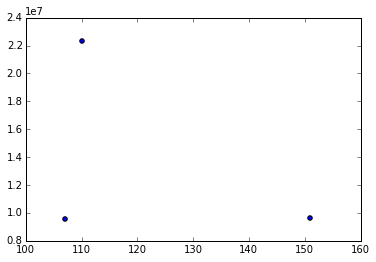

In [565]:
j = 1
wk16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == '16wk']
smt16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'smt_16wk']
ymt16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'ymt_16wk']

med = [110, 107, 151]

wk16_ = np.array([int(met1[j][i]) for i in wk16 ])
smt16_ = np.array([int(met1[j][i]) for i in smt16 ])
ymt16_ = np.array([int(met1[j][i]) for i in ymt16 ])
data = [wk16_, smt16_, ymt16_]
y = [np.mean(i) for i in data ]

plt.scatter(med, y)
plt.show()

In [566]:
def regrit(j):
    wk16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == '16wk']
    smt16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'smt_16wk']
    ymt16 = [met1[0].index(i) for i in met1[0][1:] if kdict[i] == 'ymt_16wk']

    wk16_ = np.array([int(met1[j][i]) for i in wk16 ])
    smt16_ = np.array([int(met1[j][i]) for i in smt16 ])
    ymt16_ = np.array([int(met1[j][i]) for i in ymt16 ])

    data = [wk16_, smt16_, ymt16_]
    y = [np.mean(i) for i in data ]
    med = [110, 107, 151]
    
    plt.scatter(med, y)
    plt.show()